<a href="https://colab.research.google.com/github/Gabrielmastrangelo/Pal-Leaders-Program/blob/main/empiricalVar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating the Empirical VAR (Value at Risk)

Here we are going to use our knowledge in quantiles, to compute a vary famous and important measure of risk, broadly used in the financial market.

Based in a level of confidence, we want to know what is the worst outcome possible. For the empirical VAR, we use the historical data, and we solve it by using quantiles.

### Installing the libraries for the project

In [32]:
pip install yfinance

Calling the libraries, and setting the securities that we are going to analyse

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np

plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")
securities = ['TIP','HYG', 'IVV', 'EWZ']

### Getting the data

In [5]:
def getPortfData(securities):
    '''
    Gets the values of the securities and concatenate them into a dataframe
    '''
    basket_returns = []
    
    for asset in securities:
        security = yf.Ticker(asset).history(period="max")
        returns = security['Close'].pct_change().dropna()
        basket_returns.append(returns)

    hist_returns = pd.concat(basket_returns, 1)
    hist_returns.columns = securities
    hist_returns = hist_returns.dropna()
        
    return hist_returns

data = getPortfData(securities)

### Ploting

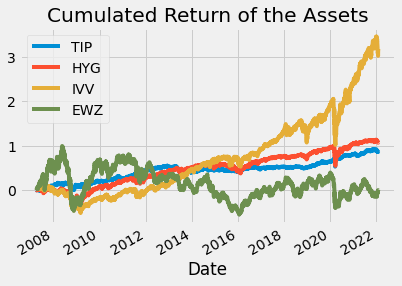

In [8]:
((data+1).cumprod()-1).plot(title = "Cumulated Return of the Assets")

# Value At Risk (VAR)

We are going to plot the histograms for the returns, and plot vertical lines at the quantiles that we chosen as level of risk.

### Histograms for the assets

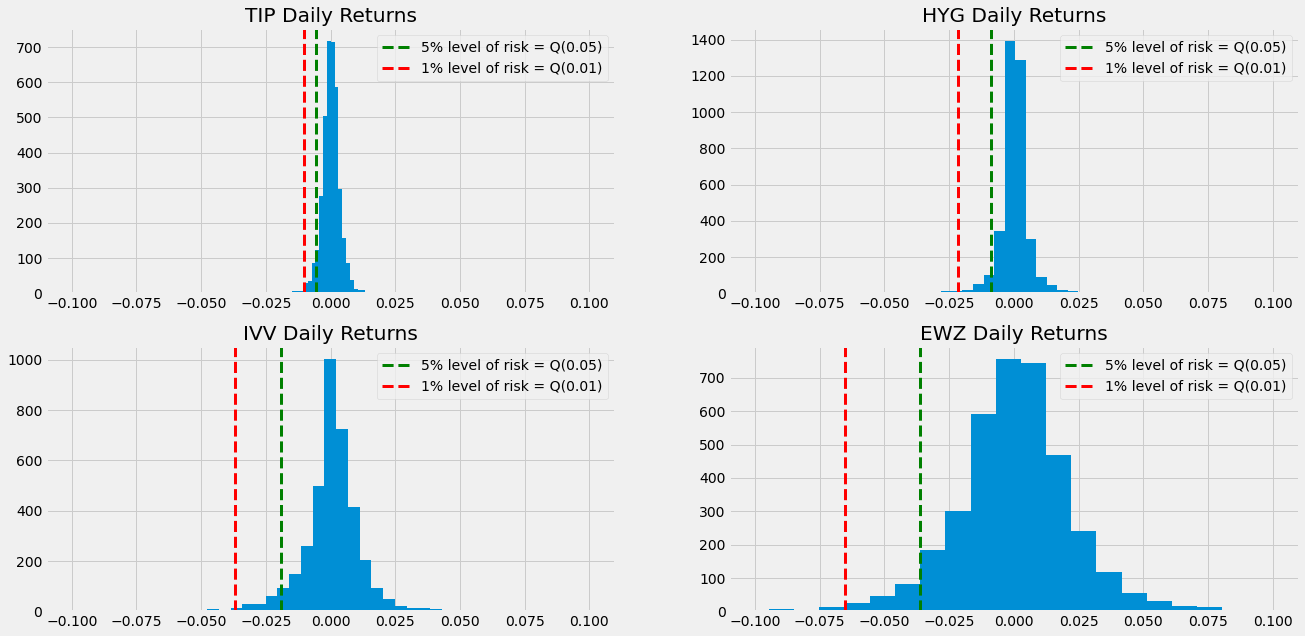

In [12]:
plt.figure(figsize=(20, 10))

labels = ['5% level of risk = Q(0.05)', '1% level of risk = Q(0.01)']
colours = ['green', 'red']

i = 1
for column in data:
    plt.subplot(int(f'22{i}')).hist(data[column], bins = 50)
    plt.xlim(( -0.11, 0.11))
    plt.title(column + ' Daily Returns')
    quantiles = np.quantile(data[column],[0.05, 0.01])
    for k in range(2):
        plt.axvline(x=quantiles[k], color = colours[k], label = labels[k], linestyle = "dashed", linewidth = 3 )
    plt.legend()
    i = 1 + i

# Empirical VAR

In [20]:
result = data.apply(lambda x: np.quantile(x,[0.05, 0.01]), axis = 0)
result.index = ['95% Confidence', '99% Confidence']
round((result*100), 2)

,TIP,HYG,IVV,EWZ
95% Confidence,-0.58,-0.87,-1.93,-3.63
99% Confidence,-1.01,-2.18,-3.70,-6.53


# Empirical VAR Modified

Istead of returning the quantile, we calculate it first, and them we calculate the average of returns less than the found boundary.

In [30]:
def meanNegReturns(level, returns):
  result = []
  for x in [0.05, 0.01]:
    boundary = np.quantile(returns, x)
    result.append(returns[ returns < boundary].mean())
  return result

result = data.apply(lambda x: meanNegReturns(0.05, x), axis = 0)
result.index = ['95% Confidence', '99% Confidence']
round((result*100), 2)

,TIP,HYG,IVV,EWZ
95% Confidence,-0.90,-1.74,-3.16,-5.83
99% Confidence,-1.56,-3.56,-5.52,-10.31
